# Môn Chuyên đề 1 - Chủ đề: Học máy và khai phá dữ liệu nâng cao

Tải thư viện và nhập tệp dữ liệu đã được lấy tại nguồn <https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news?resource=download>

In [ ]:
#Dẫn thư viện
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle
print("Setup complete.")

Setup complete.


Tải tệp dữ liệu vào notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Sentiment Analysis for Financial News/all-data.csv"

In [ ]:
df = pd.read_csv(path ,encoding='latin1')
df.head()

sentiments                           financial_news_headlines
0    neutral  According to Gran , the company has no plans t...
1    neutral  Technopolis plans to develop in stages an area...
2   negative  The international electronic industry company ...
3   positive  With the new production plant the company woul...
4   positive  According to the company 's updated strategy f...

Kiểm tra file dữ liệu có chứa dữ liệu null hay không

In [ ]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the results
print(null_counts)

sentiments                  0
financial_news_headlines    0
headline_length             0
dtype: int64


Đếm số lượng các loại Sentiment có mặt trong tệp dữ liệu

In [ ]:
df.groupby('sentiments').count()

financial_news_headlines
sentiments                          
negative                         604
neutral                         2879
positive                        1363

Vẽ biểu đồ cột giữa số lượng các loại sentiment (positive - negative - neutral) và phần trăm phân bổ

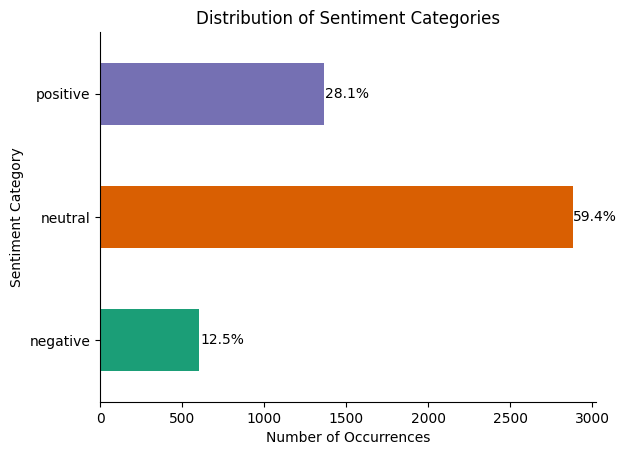

In [ ]:
# Calculate percentages
total = len(df)
sentiment_counts = df.groupby('sentiments').size()
percentages = (sentiment_counts / total) * 100

# Create the bar plot
ax = sentiment_counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.ylabel('Sentiment Category')
plt.xlabel('Number of Occurrences')
plt.title('Distribution of Sentiment Categories')

# Add percentage labels to each bar
for i, (sentiment, count) in enumerate(sentiment_counts.items()):
    ax.text(count + 5, i, f'{percentages[sentiment]:.1f}%', va='center')

plt.show()

Thêm cột tính độ dài của tiêu đề báo tài chính

In [ ]:
df['headline_length'] = df['financial_news_headlines'].str.len()

In [ ]:
df.head()

sentiments                           financial_news_headlines  \
0    neutral  According to Gran , the company has no plans t...   
1    neutral  Technopolis plans to develop in stages an area...   
2   negative  The international electronic industry company ...   
3   positive  With the new production plant the company woul...   
4   positive  According to the company 's updated strategy f...   

   headline_length  
0              127  
1              190  
2              228  
3              206  
4              203

from matplotlib import pyplot as plt
_df_3['headline_length'].plot(kind='hist', bins=20, title='headline_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sentiments').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('financial_news_headlines').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['headline_length'].plot(kind='line', figsize=(8, 4), title='headline_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['financial_news_headlines'].value_counts()
    for x_label, grp in _df_7.groupby('sentiments')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sentiments')
_ = plt.ylabel('financial_news_headlines')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sentiments'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='headline_length', y='sentiments', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['financial_news_headlines'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='headline_length', y='financial_news_headlines', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Vẽ box plot cho phân bổ độ dài của các tiêu đề báo tài chính ứng với các Sentiment

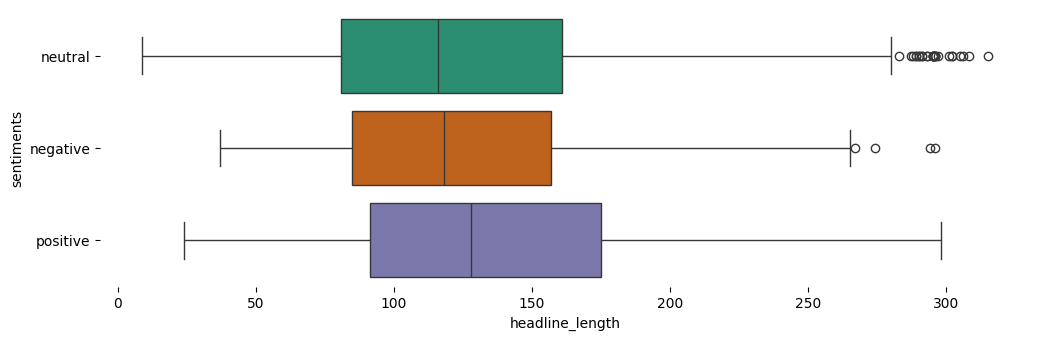

In [ ]:
figsize = (12, 1.2 * len(df['sentiments'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(df, x='headline_length', y='sentiments', palette='Dark2') # Changed to sns.boxplot
sns.despine(top=True, right=True, bottom=True, left=True)

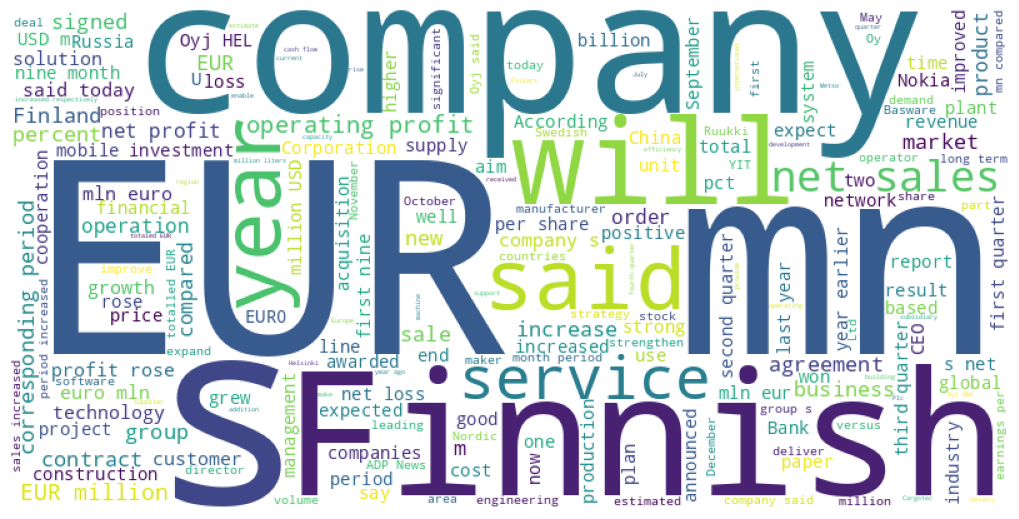

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Filter for positive sentiment
positive_df = df[df['sentiments'] == 'positive']

# Combine all headlines into a single string
text = ' '.join(positive_df['financial_news_headlines'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

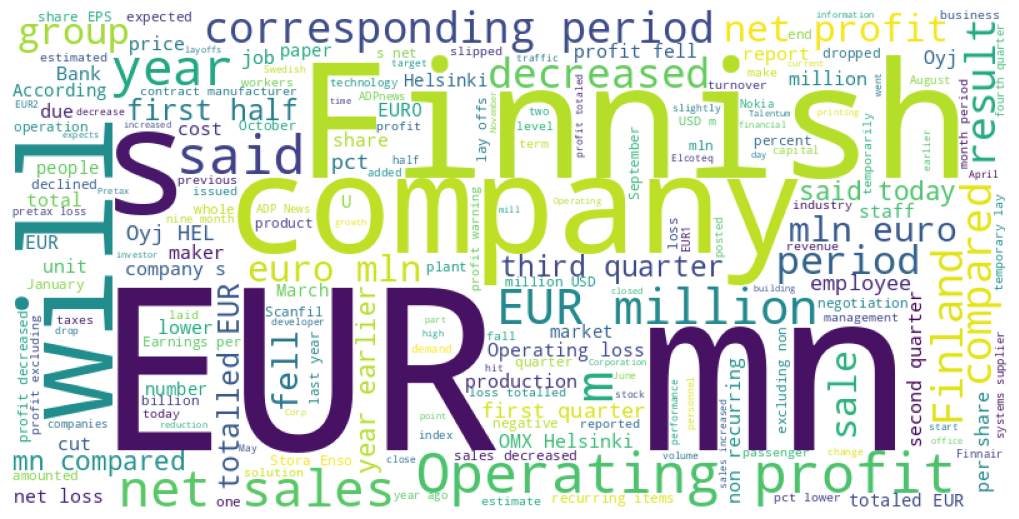

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Filter for positive sentiment
negative_df = df[df['sentiments'] == 'negative']

# Combine all headlines into a single string
text = ' '.join(negative_df['financial_news_headlines'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

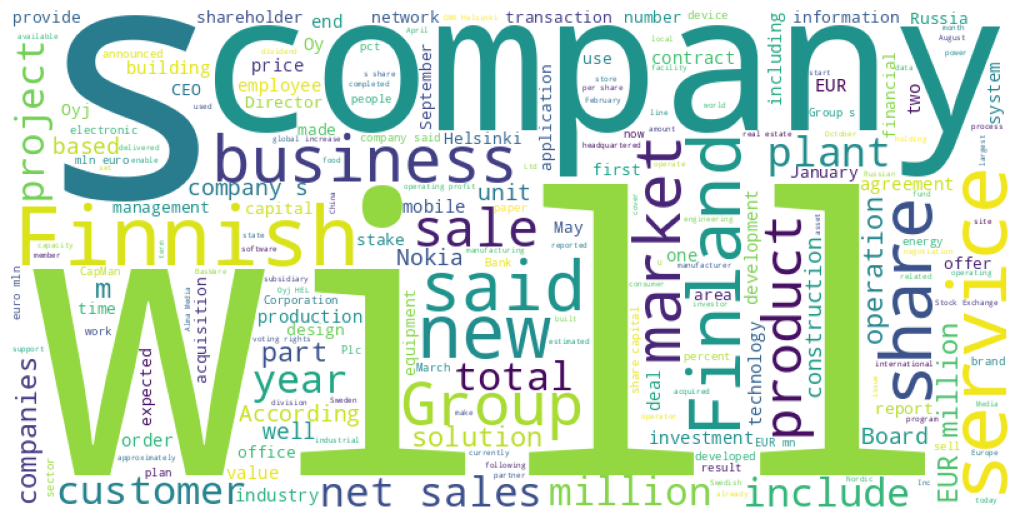

In [ ]:
# Filter for positive sentiment
neutral_df = df[df['sentiments'] == 'neutral']

# Combine all headlines into a single string
text = ' '.join(neutral_df['financial_news_headlines'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
!pip install pyspark==3.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285391 sha256=45d6bafd6a7f7f5616e9e96f561fcd74ebbe3971bbb1fde67ac58f8c78bd50a7
  Stored in directory: /root/.cache/pip/wheels/e9/b4/d8/38accc42606f6675165423e9f0236f8e825f6b6b6048d6743e
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.7.2 requires pyspark[connect]>=3.5, but you have pyspark 3.4.1 which is incompatible.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, udf
from pyspark.sql.types import ArrayType, StringType
from pyspark.ml.feature import Tokenizer

In [ ]:
spark = SparkSession.builder.appName("TokenizerExample").getOrCreate()

In [ ]:
spark_df = spark.createDataFrame(df)

In [ ]:
tokenizer = Tokenizer(inputCol="financial_news_headlines", outputCol="tokens")

In [ ]:
tokenized_df = tokenizer.transform(spark_df)

In [ ]:
tokenized_df.select("sentiments","financial_news_headlines", "tokens").show()

+----------+------------------------+--------------------+
|sentiments|financial_news_headlines|              tokens|
+----------+------------------------+--------------------+
|   neutral|    According to Gran...|[according, to, g...|
|   neutral|    Technopolis plans...|[technopolis, pla...|
|  negative|    The international...|[the, internation...|
|  positive|    With the new prod...|[with, the, new, ...|
|  positive|    According to the ...|[according, to, t...|
|  positive|    FINANCING OF ASPO...|[financing, of, a...|
|  positive|    For the last quar...|[for, the, last, ...|
|  positive|    In the third quar...|[in, the, third, ...|
|  positive|    Operating profit ...|[operating, profi...|
|  positive|    Operating profit ...|[operating, profi...|
|  positive|    TeliaSonera TLSN ...|[teliasonera, tls...|
|  positive|    STORA ENSO , NORS...|[stora, enso, ,, ...|
|  positive|    A purchase agreem...|[a, purchase, agr...|
|  positive|    Finnish Talentum ...|[finnish, talentu..

In [ ]:
from pyspark.ml.feature import StopWordsRemover

In [ ]:
remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_stopwords_tokens")

In [ ]:
removed_stopwords_df = remover.transform(tokenized_df)

In [ ]:
removed_stopwords_df.select("sentiments","financial_news_headlines","tokens",  "filtered_stopwords_tokens").show()

+----------+------------------------+--------------------+-------------------------+
|sentiments|financial_news_headlines|              tokens|filtered_stopwords_tokens|
+----------+------------------------+--------------------+-------------------------+
|   neutral|    According to Gran...|[according, to, g...|     [according, gran,...|
|   neutral|    Technopolis plans...|[technopolis, pla...|     [technopolis, pla...|
|  negative|    The international...|[the, internation...|     [international, e...|
|  positive|    With the new prod...|[with, the, new, ...|     [new, production,...|
|  positive|    According to the ...|[according, to, t...|     [according, compa...|
|  positive|    FINANCING OF ASPO...|[financing, of, a...|     [financing, aspoc...|
|  positive|    For the last quar...|[for, the, last, ...|     [last, quarter, 2...|
|  positive|    In the third quar...|[in, the, third, ...|     [third, quarter, ...|
|  positive|    Operating profit ...|[operating, profi...|     [o

In [ ]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
from nltk.stem.porter import PorterStemmer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

stem_udf = udf(stem_tokens, ArrayType(StringType()))

In [ ]:
stemmed_df = removed_stopwords_df.withColumn("stemmed_tokens", stem_udf("filtered_stopwords_tokens"))

In [ ]:
stemmed_df.select("sentiments","tokens","financial_news_headlines", "stemmed_tokens").show()

+----------+--------------------+------------------------+--------------------+
|sentiments|              tokens|financial_news_headlines|      stemmed_tokens|
+----------+--------------------+------------------------+--------------------+
|   neutral|[according, to, g...|    According to Gran...|[accord, gran, ,,...|
|   neutral|[technopolis, pla...|    Technopolis plans...|[technopoli, plan...|
|  negative|[the, internation...|    The international...|[intern, electron...|
|  positive|[with, the, new, ...|    With the new prod...|[new, product, pl...|
|  positive|[according, to, t...|    According to the ...|[accord, compani,...|
|  positive|[financing, of, a...|    FINANCING OF ASPO...|[financ, aspocomp...|
|  positive|[for, the, last, ...|    For the last quar...|[last, quarter, 2...|
|  positive|[in, the, third, ...|    In the third quar...|[third, quarter, ...|
|  positive|[operating, profi...|    Operating profit ...|[oper, profit, ro...|
|  positive|[operating, profi...|    Ope

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
all_lemmatized_tokens = lemmatized_df.select("lemmatized_tokens").rdd.flatMap(lambda x: x[0]).collect()

In [ ]:
from nltk.stem import WordNetLemmatizer
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType

# Download WordNet data (if not already downloaded)
import nltk
nltk.download('wordnet')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a UDF for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

lemmatize_udf = udf(lemmatize_tokens, ArrayType(StringType()))

# Apply the UDF to the "filtered_stopwords_tokens" column
lemmatized_df = stemmed_df.withColumn("lemmatized_tokens", lemmatize_udf("filtered_stopwords_tokens"))

# Show the DataFrame with lemmatized tokens
lemmatized_df.select("sentiments","tokens", "financial_news_headlines","stemmed_tokens", "lemmatized_tokens").show()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


+----------+--------------------+------------------------+--------------------+--------------------+
|sentiments|              tokens|financial_news_headlines|      stemmed_tokens|   lemmatized_tokens|
+----------+--------------------+------------------------+--------------------+--------------------+
|   neutral|[according, to, g...|    According to Gran...|[accord, gran, ,,...|[according, gran,...|
|   neutral|[technopolis, pla...|    Technopolis plans...|[technopoli, plan...|[technopolis, pla...|
|  negative|[the, internation...|    The international...|[intern, electron...|[international, e...|
|  positive|[with, the, new, ...|    With the new prod...|[new, product, pl...|[new, production,...|
|  positive|[according, to, t...|    According to the ...|[accord, compani,...|[according, compa...|
|  positive|[financing, of, a...|    FINANCING OF ASPO...|[financ, aspocomp...|[financing, aspoc...|
|  positive|[for, the, last, ...|    For the last quar...|[last, quarter, 2...|[last, quart

text = " ".join(all_lemmatized_tokens)

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

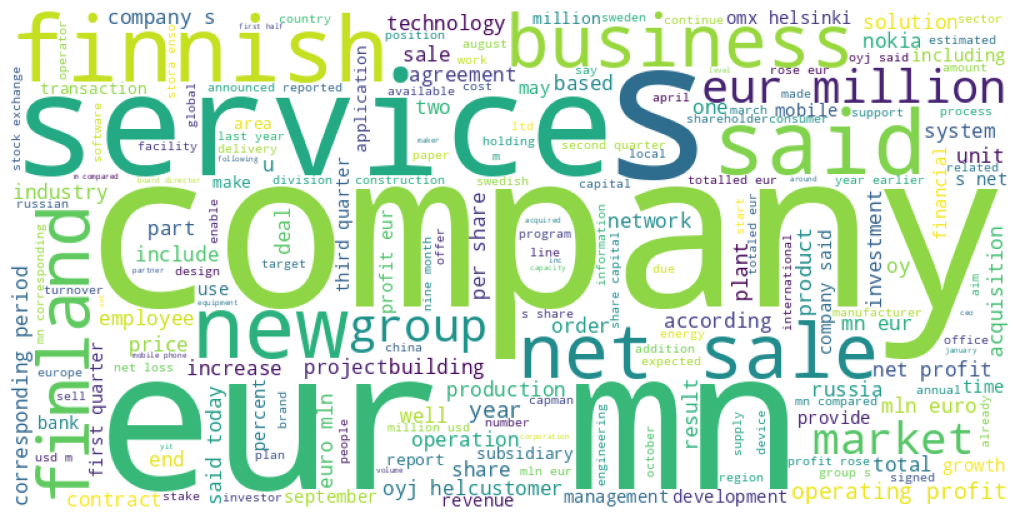

In [ ]:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

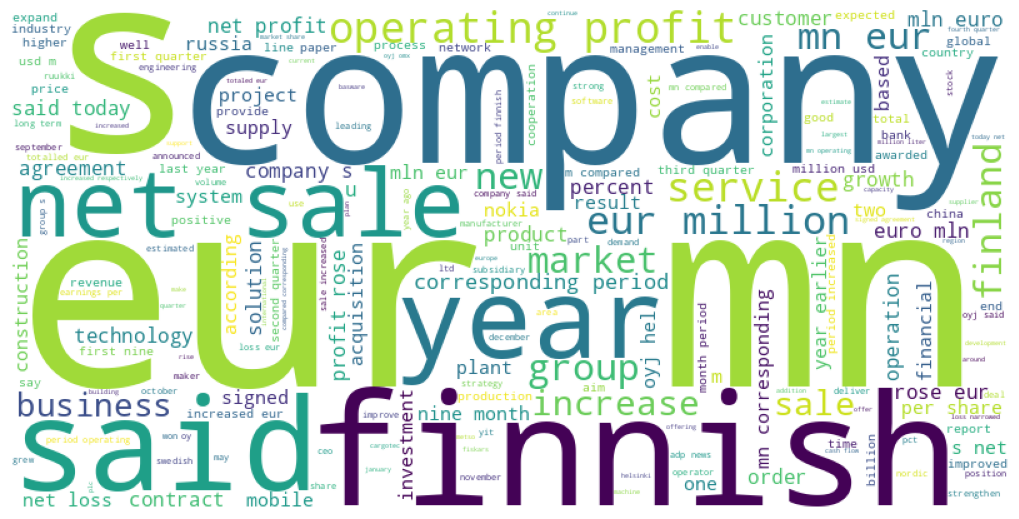

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter for positive sentiment
positive_df = lemmatized_df.filter(col("sentiments") == "positive")

# Collect lemmatized tokens from positive headlines
positive_tokens = positive_df.select("lemmatized_tokens").rdd.flatMap(lambda x: x[0]).collect()

# Join tokens into a single string
text = " ".join(positive_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

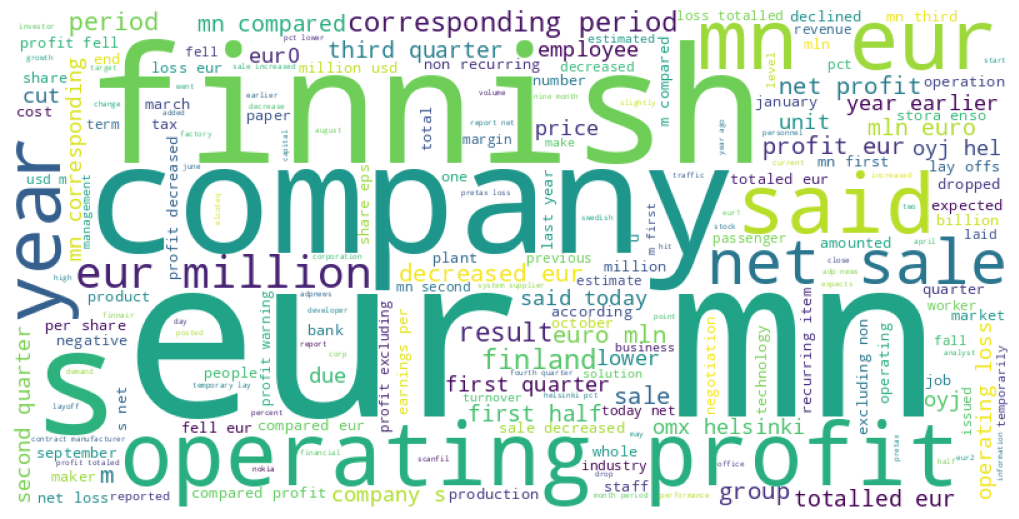

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter for negative sentiment
negative_df = lemmatized_df.filter(col("sentiments") == "negative")

# Collect lemmatized tokens from negative headlines
negative_tokens = negative_df.select("lemmatized_tokens").rdd.flatMap(lambda x: x[0]).collect()

# Join tokens into a single string
text = " ".join(negative_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

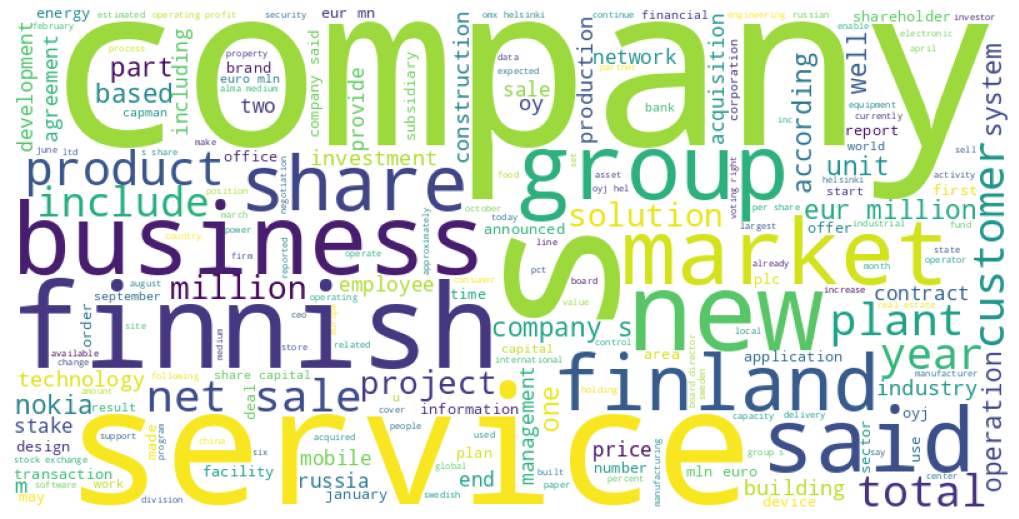

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Filter for neutral sentiment
neutral_df = lemmatized_df.filter(col("sentiments") == "neutral")

# Collect lemmatized tokens from neutral headlines
neutral_tokens = neutral_df.select("lemmatized_tokens").rdd.flatMap(lambda x: x[0]).collect()

# Join tokens into a single string
text = " ".join(neutral_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()